<a href="https://colab.research.google.com/github/klaus78/Data_Science_Flashcards/blob/master/Get_started_with_Data_Science_weeks_1_to_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Week 1
The target of this week is to be able to open a dataset and perform some basic data exploration tasks.

The tasks of this week are
1. open the Titanic dataset and print the dataset size
2. show first rows
3. check column types (numeric, text etc)
4. find columns with missing values 
5. find  percentage passengers who survived

In [2]:
# open Titanic dataset
csv_url = 'https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv'
df = pd.read_csv(csv_url)

In [3]:
# print dataset size as (nrows, ncols)
print(df.shape)

(891, 12)


In [4]:
# show first tows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# find columns with missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Week 2
The target of this week is to get familiar with some data transformations (handling of missing values) and filtering.

The tasks of this week are

1. Handle missing values. Drop the column with more than 600 missing values. Replace the `nan` values with the most common value in the other columns. 
2. Find the number of people died who were younger than `10`.
3. Find the percentage of people died who were older than `50` and were in the first class.
4. Find the number of people from the first class that either embarked in `S` or `C`.

In [7]:
# 1. Handle missing values. Drop the column with more than 600 missing values

# The columns with missing values are 'Cabin', 'Age' and 'Embarked'.

# The column with more than 600 values missing is 'Cabin' and it can be dropped
df.drop(labels='Cabin',axis=1, inplace=True)

In [8]:
# Replace the nan values with the most common value in the other columns.

# The remaining columns with missing values are 'Age' and 'Embarked'
most_common_age = df.Age.mode()[0]
most_common_embarked = df.Embarked.mode()[0]

# fill na values with the most common values
df.Age.fillna(value=most_common_age, inplace=True)
df.Embarked.fillna(most_common_embarked, inplace=True)

In [9]:
# 2. Find the number of people died who were younger than 10.
df[(df.Survived == 0) & (df.Age < 10)].shape

(24, 11)

In [10]:
# 3. Find the percentage of people died who were older than 50 and were in the first class.
num_filtered_rows = df[(df.Survived == 0) & (df.Age > 50) & df.Pclass==1].shape[0]
num_tot_rows = df.shape[0]
perc = (num_filtered_rows / num_tot_rows) * 100
print(perc)

3.3670033670033668


In [11]:
# 4. Find the number of people from the first class that either embarked in S or C.
df[(df.Pclass == 1) & (df.Embarked.isin(['S','C'])) ].shape[0]

214

#Week 3
The exercises of this week make you (1) divide numeric data into intervals, (2) work with text features (filtering by text etc) and (3) map a set of values into another set of values.

The exercises of this week are
1. Divide the `Age` column into the following bins: 
```
(0-14) -> child
(14-21) -> young
(21-55) -> adult
(55-100 ) -> old
```
Create a new column `Age_binned` for that.

2. Find the number of occurrences of the `Miss` string in the `Name` column.

3. Create a new column `Survived_text` from the `Survived` column, where `0` values are mapped to `died` and `1` values are mapped to `survived`.

4. Find all the possible titles of the passengers. For example given a name like `John, Mr. Smith`,  `Mr.` is the title.

In [12]:
# 1. Divide the Age column into the bins 
mylabels = ['child','young','adult','old']
mybins = [0,14,21,55,100]
df['Age_binned'] = pd.cut(df.Age, bins = mybins, labels = mylabels)

In [13]:
# 2. Find the number of occurrences of the 'Miss' string in the 'Name' column.
num_occurencies_miss = df.Name.str.contains('Miss').sum()

In [14]:
# 3. Create a new column 'Survived_text' from the 'Survived' column, where 0 values are mapped to 'died' and 1 values are mapped to 'survived'.

# create a map dictionary
dict_map = {0:'died',1:'survived'}
df['Survived_text'] = df.Survived.map(dict_map)

In [ ]:
# 4. Find all the possible titles of the passengers. For example given a name like 'John, Mr. Smith', 'Mr.' is the title.
all_titles = df.Name.apply(lambda s : s.split(',')[1].split(' ')[1])
np.unique(all_titles)

#Week 4

The data science exercises of this week make you get started with grouping functions and pivot tables.

The exercises of this week are
1. find the average age of passengers in first, second and third class
2. For each class, find the number of passengers who survived and the number of passengers who died.
3. Group by passenger class (`Pclass`) and by `Sex` to see, for each class and for each sex, the percentage of people who survived.
4. Group by passenger class (`Pclass`) and for each class show the mean and the standard deviation of the 'Fare' feature.

In [ ]:
# 1. find the average age of passengers in first, second and third class
pd.pivot_table(data= df, values='Age', index='Pclass')

In [ ]:
# 1. use 'pd.pivot_table'
# 2. use 'df.groupby' + ''count()'
# 3. use 'df.groupby' + 'value_counts(normalize=True)' 
# 4. use 'df.groupby' + 'agg'

In [ ]:
# 2. For each class, find the number of passengers who survived and the number of passengers who died.
df.groupby('Pclass')['Survived'].value_counts()

In [ ]:
# 3. Group by passenger class (Pclass) and by Sex to see, for each class and for each sex, the percentage of people who survived.
df.groupby(by=['Pclass','Sex'])['Survived'].value_counts(normalize=True)

In [33]:
# 4. Group by passenger class (Pclass) and for each class show the mean and the standard deviation of the 'Fare' feature.
df.groupby('Pclass')['Fare'].agg(['mean', 'std'])

,mean,std
Pclass,,
1,84.154687,78.380373
2,20.662183,13.417399
3,13.675550,11.778142


#Week 5
The data science exercises of this week make you get started with plots and charts.

The exercises of this week are
1. Plot a bar chart of the number of passengers for each boarding location.
2. Plot a bar chart with the number of survived for each passenger class.
3. Show the boxplot of the Age column.

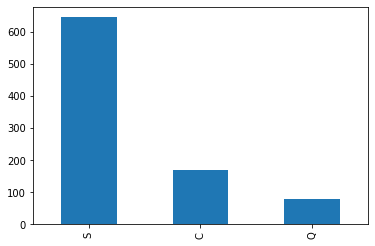

In [16]:
# bar chart of the number of passengers for each boarding location.
df.Embarked.value_counts().plot.bar()

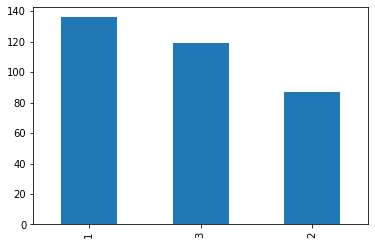

In [17]:
# bar chart with the number of survived for each passenger class.
df[df.Survived == 1].Pclass.value_counts().plot.bar()

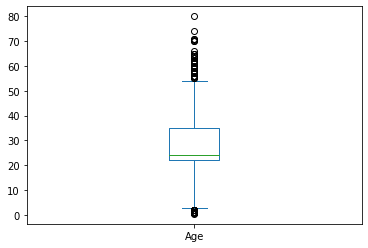

In [18]:
# boxplot of the Age column.
df.Age.plot.box()